In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.statespace.varmax import VARMAX
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sktime.performance_metrics.forecasting import smape_loss, mase_loss
import warnings
import math
warnings.filterwarnings("ignore")
from sktime.forecasting.all import temporal_train_test_split
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

from sktime.performance_metrics.forecasting import mean_absolute_error
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error
from itertools import accumulate
import itertools

C:\Users\shubh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\shubh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
vardata = pd.read_csv('data_varma.csv').rename(columns= {'Unnamed: 0':'Date'}).set_index('Date')
vardata.index = pd.to_datetime(vardata.index)
vardata

,EURUSD,NZDUSD,GBPUSD,CADUSD,JPYUSD,YC/USA5Y - Rate,YC/FRA5Y - Rate,YC/NZL5Y - Rate,YC/GBR5Y - Yield,YC/CAN5Y - Rate,YC/JPN5Y - Yield
Date,,,,,,,,,,,
2004-08-20,0.81140,1.4859,0.54910,1.2980,109.320,3.42,0.594002,6.140000,4.9500,3.760000,0.732
2004-08-23,0.81990,1.4981,0.55120,1.3065,109.470,3.46,0.594020,6.140000,5.0300,3.800000,0.762
2004-08-24,0.82650,1.5328,0.55760,1.3048,109.630,3.46,0.594037,6.210000,5.0300,3.850000,0.759
2004-08-25,0.82710,1.5354,0.55660,1.3047,110.380,3.46,0.594055,6.210000,4.9800,3.830000,0.789
2004-08-26,0.82750,1.5411,0.55740,1.3123,109.730,3.42,0.594072,6.190000,4.9600,3.810000,0.773
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,0.90145,1.5030,0.77035,1.3142,109.525,1.72,-0.354667,1.346667,0.5510,1.633333,-0.111
2019-12-26,0.90070,1.5002,0.76880,1.3124,109.670,1.72,-0.358333,1.343333,0.5514,1.626667,-0.120
2019-12-27,0.89490,1.4919,0.76390,1.3073,109.470,1.68,-0.362000,1.340000,0.5518,1.620000,-0.120


In [3]:
df_diff = vardata.diff(1).dropna()
train, test = temporal_train_test_split(df_diff[['EURUSD','NZDUSD','GBPUSD','CADUSD','JPYUSD']])

In [4]:
var_model=VAR(train)

results_aic =[]
for p in range(1,10):
    results = var_model.fit(p)
    results_aic.append(results.aic)

Text(0.5, 1.0, 'VARMA Order - BIC')

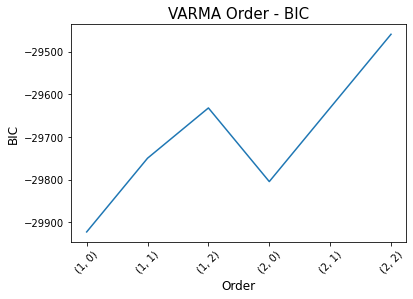

In [6]:
p = list(np.arange(1, 3, 1))
q = list(np.arange(0, 3, 1))
comb = [p,q]
results_bic =[]
pq_pair = []
for param in list(itertools.product(*comb)):
    p,q = param[0],param[1]
    model = VARMAX(test, order= (p,q))
    try:
        results = model.fit(maxiter=200, disp=False)
        pq_pair.append((p,q))
        results_bic.append(results.bic)
    except:
        continue
        
plt.plot([str(i) for i in pq_pair], results_bic)
plt.xticks(rotation = 45)
plt.xlabel("Order", fontsize = 12)
plt.ylabel("BIC", fontsize = 12)
plt.title('VARMA Order - BIC', fontsize = 15)

In [7]:
varma_model = VARMAX(train, order= (1,0))
results = varma_model.fit(maxiter=200, disp=False)
print(results.summary())

                                           Statespace Model Results                                           
Dep. Variable:     ['EURUSD', 'NZDUSD', 'GBPUSD', 'CADUSD', 'JPYUSD']   No. Observations:                 2997
Model:                                                         VAR(1)   Log Likelihood               43458.818
                                                          + intercept   AIC                         -86827.635
Date:                                                Fri, 03 Jun 2022   BIC                         -86557.394
Time:                                                        15:32:14   HQIC                        -86730.425
Sample:                                                             0                                         
                                                               - 2997                                         
Covariance Type:                                                  opg                                         
L

In [9]:
yhat = results.forecast(steps=len(test))
# clean up yhat
idx=test.index
df_preds = pd.DataFrame(yhat).set_index(idx)
df_preds.columns = ['EURUSD','NZDUSD','GBPUSD','CADUSD','JPYUSD']
forecast_results = pd.concat([vardata[-1-len(test):-len(test)][df_preds.columns],df_preds], axis=0)\
                    .reset_index(drop=True).cumsum().drop([0]).set_index(idx)

forecast_results.columns = ['EURUSD_forecast','NZDUSD_forecast','GBPUSD_forecast','CADUSD_forecast','JPYUSD_forecast']
forecast_results

,EURUSD_forecast,NZDUSD_forecast,GBPUSD_forecast,CADUSD_forecast,JPYUSD_forecast
Date,,,,,
2016-02-29,0.914642,1.504179,0.720724,1.354360,113.770615
2016-03-01,0.914678,1.504195,0.720763,1.354397,113.772265
2016-03-02,0.914711,1.504201,0.720818,1.354416,113.773720
2016-03-03,0.914745,1.504207,0.720874,1.354435,113.775207
2016-03-04,0.914778,1.504213,0.720929,1.354453,113.776694
...,...,...,...,...,...
2019-12-25,0.947788,1.510020,0.775893,1.372754,115.250382
2019-12-26,0.947821,1.510026,0.775948,1.372772,115.251869
2019-12-27,0.947854,1.510031,0.776004,1.372791,115.253356


In [10]:
def plot_results(y_train, y_test, y_pred):
    # plot the results
    y_train.plot(figsize = (15,7))
    y_test.plot()
    y_pred.plot()
    plt.legend(['y_train','y_test','y_pred'])
    plt.title(y_train.name+ ' Pred vs test',fontsize = 15)
    plt.show()

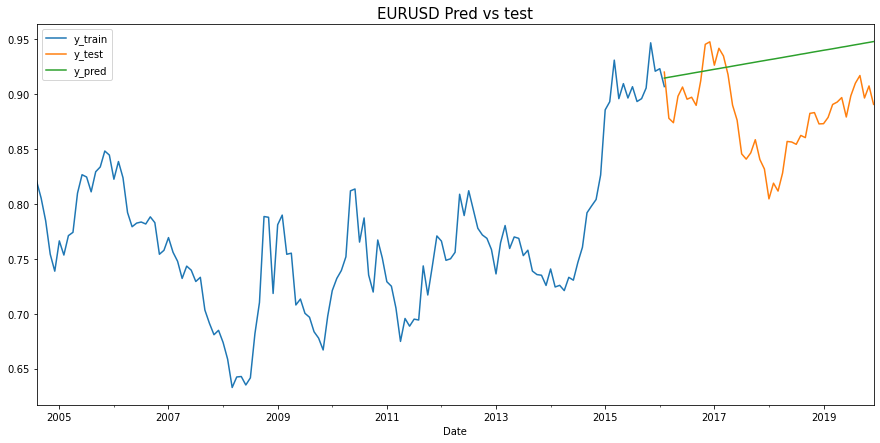

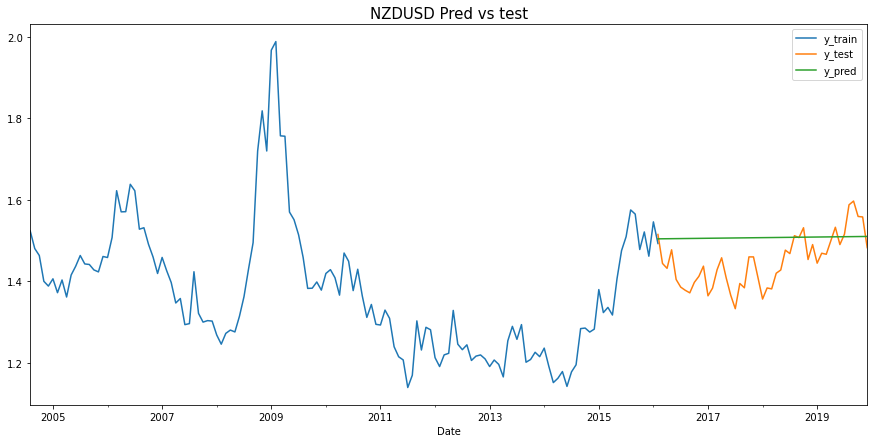

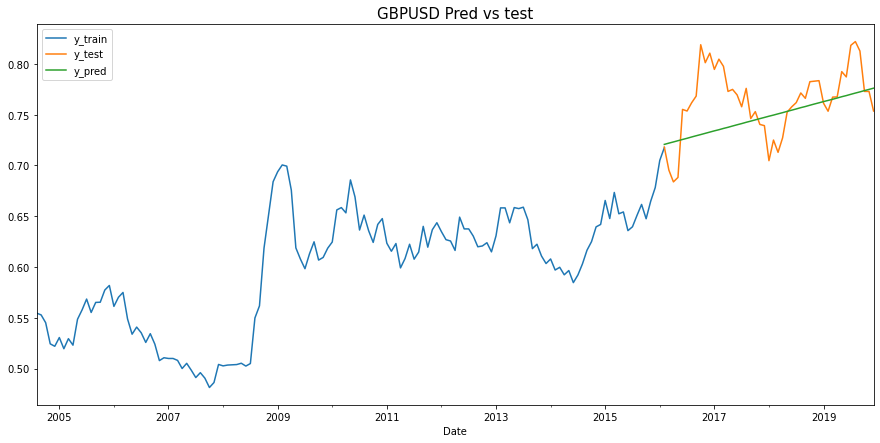

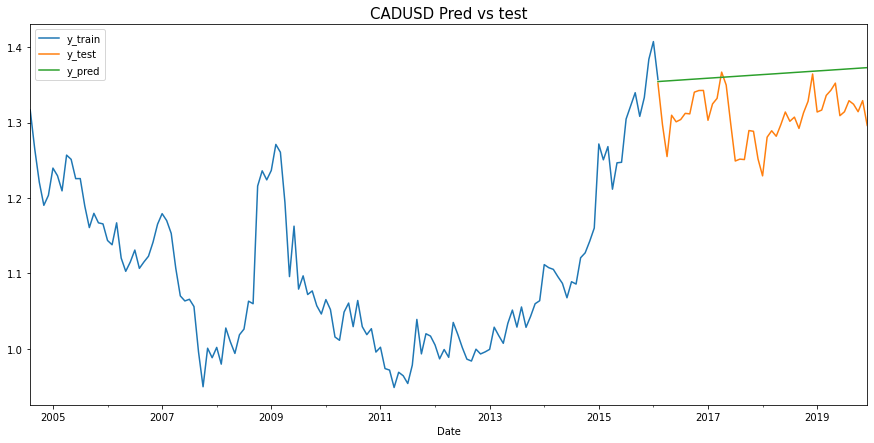

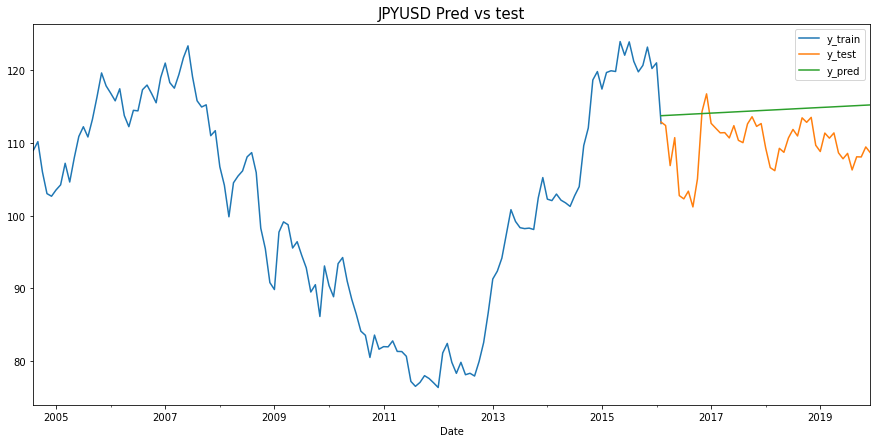

In [17]:
plot_results(vardata.iloc[1:len(train),0].resample('M').last(),vardata.iloc[-len(test):,0].resample('M').last(),forecast_results.iloc[:,0].resample('M').last())
plot_results(vardata.iloc[1:len(train),1].resample('M').last(),vardata.iloc[-len(test):,1].resample('M').last(),forecast_results.iloc[:,1].resample('M').last())
plot_results(vardata.iloc[1:len(train),2].resample('M').last(),vardata.iloc[-len(test):,2].resample('M').last(),forecast_results.iloc[:,2].resample('M').last())
plot_results(vardata.iloc[1:len(train),3].resample('M').last(),vardata.iloc[-len(test):,3].resample('M').last(),forecast_results.iloc[:,3].resample('M').last())
plot_results(vardata.iloc[1:len(train),4].resample('M').last(),vardata.iloc[-len(test):,4].resample('M').last(),forecast_results.iloc[:,4].resample('M').last())

In [12]:
def model_evaluate(y_test, y_pred,y_train, var):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = MeanAbsolutePercentageError(symmetric=False)
    mape = mape(y_test, y_pred)
    smape = MeanAbsolutePercentageError()
    smape_val = smape(y_test, y_pred)
    mase = mean_absolute_scaled_error(y_test, y_pred, y_train = y_train)
    return pd.DataFrame([[mae,mse,rmse,mape,smape_val,mase]],columns = ['MAE','MSE','RMSE','MAPE','sMAPE','MASE'],index= ['Test vs Pred - ' + var])

In [14]:
eur_summary_data = model_evaluate(vardata.iloc[-len(test):,0], forecast_results.iloc[:,0],vardata.iloc[1:len(train),0], 'EURUSD')
nzd_summary_data = model_evaluate(vardata.iloc[-len(test):,1], forecast_results.iloc[:,1],vardata.iloc[1:len(train),1], 'NZDUSD')
gbp_summary_data = model_evaluate(vardata.iloc[-len(test):,2], forecast_results.iloc[:,2],vardata.iloc[1:len(train),2], 'GBPUSD')
cad_summary_data = model_evaluate(vardata.iloc[-len(test):,3], forecast_results.iloc[:,3],vardata.iloc[1:len(train),3], 'CADUSD')
jpy_summary_data = model_evaluate(vardata.iloc[-len(test):,4], forecast_results.iloc[:,4],vardata.iloc[1:len(train),4], 'JPYUSD')

In [15]:
pd.concat([eur_summary_data, nzd_summary_data, gbp_summary_data, cad_summary_data,jpy_summary_data], axis = 0)

,MAE,MSE,RMSE,MAPE,sMAPE,MASE
Test vs Pred - EURUSD,0.053591,0.003827,0.061861,0.062138,0.059663,15.639884
Test vs Pred - NZDUSD,0.071293,0.007064,0.084046,0.050378,0.048782,7.964104
Test vs Pred - GBPUSD,0.028948,0.001357,0.036831,0.037370,0.038141,11.276331
Test vs Pred - CADUSD,0.055859,0.004017,0.063376,0.043271,0.042081,11.579595
Test vs Pred - JPYUSD,4.842399,33.314410,5.771864,0.045004,0.043592,10.529935
